*Author: Fadi Makarem*

<h1>Data Augmentation For Computer Vision</h1>
<h4>
This notebook demostrates data augmentation for computer vision.</br>

Note: the focus of the notebook is not on achieving the best performance. The purpose is to show the effect of data augmentation.

</h4>


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#set the random seed to reproduce results
keras.utils.set_random_seed(20)
# tf.config.experimental.enable_op_determinism()

np.random.seed(20)

#Set common values
dropout_rate=0.3
epochs=50

In [3]:
# (train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [4]:
# plt.imshow(train_images[1])

<h2>Downloading the data</h2>

In [5]:

'''
  doc of dataset in the link below:
  https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
  10 classes

  Label	  Description
  0	      airplane
  1	      automobile
  2	      bird
  3	      cat
  4	      deer
  5	      dog
  6	      frog
  7	      horse
  8	      ship
  9	      truck


'''
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 3s 0us/step


<h2> verify the shape of the data</h2>

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
np.unique(y_train.ravel(), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

<h2>Visualize the images</h2>

[[[255 255 247]
  [254 254 246]
  [254 253 243]
  ...
  [249 248 240]
  [245 245 236]
  [245 245 235]]

 [[253 251 245]
  [249 247 244]
  [248 247 240]
  ...
  [241 239 238]
  [240 238 236]
  [245 243 237]]

 [[236 232 215]
  [237 232 218]
  [228 224 207]
  ...
  [228 222 209]
  [225 219 203]
  [222 216 193]]

 ...

 [[ 75  75  62]
  [ 81  79  67]
  [ 82  80  67]
  ...
  [ 63  62  52]
  [ 61  60  51]
  [ 68  67  57]]

 [[ 67  67  56]
  [ 72  69  60]
  [ 76  73  63]
  ...
  [ 54  54  45]
  [ 54  54  45]
  [ 54  54  45]]

 [[ 68  67  58]
  [ 70  68  60]
  [ 72  69  61]
  ...
  [ 55  55  48]
  [ 57  56  50]
  [ 53  52  45]]]


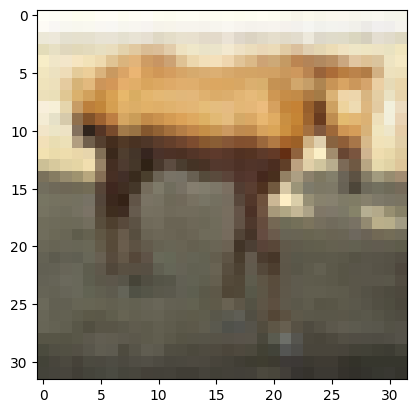

In [9]:
i=2000
print(x_train[i])
plt.imshow(x_train[i])

<h2>Augmentation Techniques</h2>

In [10]:
zoom=tf.keras.layers.RandomZoom(
    height_factor=(-0.1,0.3),
    width_factor=None,
    interpolation='bilinear',
    seed=10
)

trans=tf.keras.layers.RandomTranslation(
    height_factor=(-0.2,0.2),
    width_factor=(-0.2,0.2),
    interpolation='bilinear',
    seed=10
)

# rotation between -pi/4 and pi/4
rotation=tf.keras.layers.RandomRotation(
    factor=(-1/8,1/8),
    fill_mode='reflect',
    interpolation='bilinear',
    seed=10
)

#Can be "horizontal", "vertical", or "horizontal_and_vertical"
flip=tf.keras.layers.RandomFlip(mode="horizontal", seed=10)

crop=tf.keras.layers.RandomCrop(height=24, width=24, seed=10)

contrast=tf.keras.layers.RandomContrast(factor=0.2, seed=10)

brightness=tf.keras.layers.RandomBrightness(factor=0.1, value_range=(0, 1), seed=10)

gaussian=tf.keras.layers.GaussianNoise(stddev=0.2, seed=10)

aug_layers=[(zoom,'Zoom'),
            (trans,'Translation'),
            (rotation,'Rotation'),
            (flip,'Flip'),
            (crop,'Crop'),
            (contrast,'Contrast'),
            (brightness,'Brightness'),
            (gaussian,'Gaussian')]

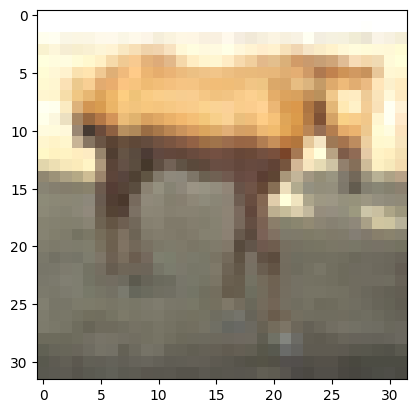

In [11]:
plt.imshow(brightness(x_train[2000]/255))

multiple of 3
nrows: 3
8
Zoom
(32, 32, 3)
Translation
(32, 32, 3)
Rotation
(32, 32, 3)
Flip
(32, 32, 3)
Crop
(24, 24, 3)
Contrast
(32, 32, 3)
Brightness
(32, 32, 3)
Gaussian
(32, 32, 3)


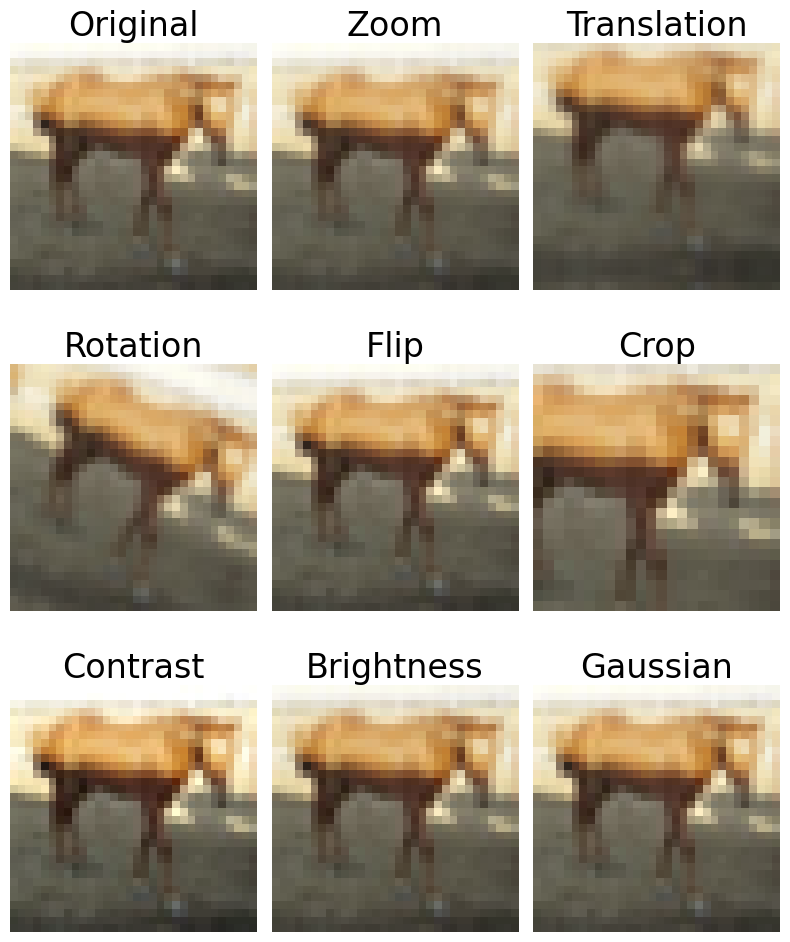

In [14]:
index=2000
image=x_train[index].reshape((32,32,3))/255

n_aug=len(aug_layers)+1
ncols=3
if int(np.ceil((n_aug)%3))>0:
  nrows=(n_aug+1)//3 + 1
else:
  print('multiple of 3')
  nrows=(n_aug)//3

print('nrows:',nrows)
fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(8,10))

ax[0][0].imshow(image,cmap='gray')
ax[0][0].set_title('Original', size=24)
ax[0][0].axis("off")

i=0
print(len(aug_layers))
for j in range(len(aug_layers)):

    layer,aug_name=aug_layers[j]
    j+=1

    img=layer(image)

    print(aug_name)
    print(img.shape)

    col=int(j%3)
    row=int(j//3)

    # print(f'image{j}')
    # print('row:',row)
    # print('col:',col)
    ax[row][col].imshow(img)
    ax[row][col].set_title(aug_name, size=24)
    ax[row][col].axis("off")

fig.tight_layout()

plt.axis('off')
plt.savefig(f'example.png')
plt.show()


<h3>Now Apply all together</h3>

The different images demonstrate the effect of each augmentation technique on the images. some could subtle byt still useful for training. You can modify the values to make the effect clearer.

<Figure size 640x480 with 0 Axes>

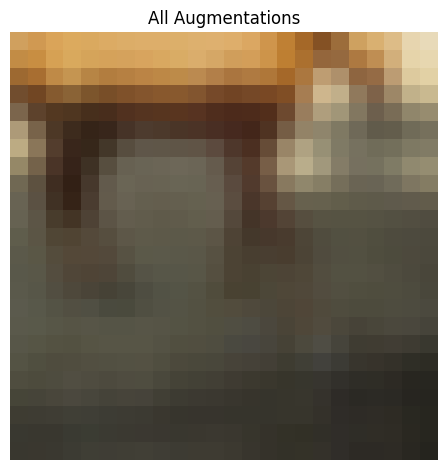

In [13]:
plt.clf()

fig, ax = plt.subplots(nrows=1)

img=image
for layer,_ in aug_layers:
  img=layer(img)

ax.title.set_text('All Augmentations')
ax.axis('off')
fig.tight_layout()
ax.imshow(img)

fig.savefig('all_aug.png')


plt.show()

Applying all augmentations creates a new image that is clearly different with respect to the original image. However, it is still clear the class of the image. Hence, diversifying the dataset.

<h3>The image is clearly of a horse and it is different from the original one. However, it is clearly a horse. These kind of augmentation can help the model.</h3>

In [ ]:
img.shape

TensorShape([24, 24, 3])

<h3>Make an augmentation layer</h3>

In [ ]:
class AugmentationLayer(tf.keras.layers.Layer):
  def __init__(self,
                p=0.5,
                use_zoom=True,
                use_translation=True,
                use_rotation=True,
                use_flip=True,
                use_crop=True,
                use_contrast=True,
                use_brightness=True,
                use_gaussian=True,
                **kwargs):
      super().__init__(**kwargs)
      self.p = p

      self.use_zoom=use_zoom
      self.use_translation=use_translation
      self.use_rotation=use_rotation
      self.use_flip=use_flip
      self.use_crop=use_crop
      self.use_contrast=use_contrast
      self.use_brightness=use_brightness
      self.use_gaussian=use_gaussian

      self.zoom=tf.keras.layers.RandomZoom(
          height_factor=(-0.1,0.3),
          width_factor=None,
          interpolation='bilinear',
          seed=10
      )

      self.translation=tf.keras.layers.RandomTranslation(
          height_factor=(-0.2,0.2),
          width_factor=(-0.2,0.2),
          interpolation='bilinear',
          seed=10
      )

      # rotation between -pi/4 and pi/4
      self.rotation=tf.keras.layers.RandomRotation(
          factor=(-1/8,1/8),
          fill_mode='reflect',
          interpolation='bilinear',
          seed=10
      )

      #Can be "horizontal", "vertical", or "horizontal_and_vertical"
      self.flip=tf.keras.layers.RandomFlip(mode="horizontal", seed=10)

      self.crop=tf.keras.layers.RandomCrop(height=24, width=24, seed=10)
      self.resize=tf.keras.layers.Resizing(height=32, width=32,crop_to_aspect_ratio=True)#crop_to_aspect_ratiocan take any value as we are preserving the aspect ratio anyways

      self.contrast=tf.keras.layers.RandomContrast(factor=0.2, seed=10)

      self.brightness=tf.keras.layers.RandomBrightness(factor=0.1, value_range=(0, 1), seed=10)

      self.gaussian=tf.keras.layers.GaussianNoise(stddev=0.2, seed=10)


  def call(self, x, training=False):

      if not training:
          return x

      apply_aug_prob=tf.random.uniform(shape=())
      apply_flip_prob=tf.random.uniform(shape=())#random.random()
      apply_rotation_prob=tf.random.uniform(shape=())#random.random()
      apply_zoom_prob=tf.random.uniform(shape=())#random.random()
      apply_translation_prob=tf.random.uniform(shape=())#random.random()
      apply_gauss_prob=tf.random.uniform(shape=())
      apply_bright_prob=tf.random.uniform(shape=())#random.random()
      apply_contrast_prob=tf.random.uniform(shape=())
      apply_crop_prob=tf.random.uniform(shape=())

      if apply_aug_prob<self.p and self.use_gaussian:
          if self.use_gaussian and apply_gauss_prob<self.p:
              x=self.gaussian(x)
          if self.use_flip and apply_flip_prob<self.p:
              x=self.flip(x)
          if self.use_rotation and apply_rotation_prob<self.p:
              x=self.rotation(x)
          if self.zoom and apply_zoom_prob<self.p:
              x=self.zoom(x)
          if self.use_translation and apply_translation_prob<self.p:
              x=self.translation(x)
          if self.use_contrast and apply_contrast_prob<self.p:
              x=self.contrast(x)
          if self.use_crop and apply_crop_prob<self.p:
              #for crop we need to add a resize layer to keep the shape of the image as 32x32
              x=self.crop(x)
              x=self.resize(x)
          if self.use_brightness and apply_bright_prob<self.p:
              x=self.brightness(x)

      return x

<h2>Create The Models</h2>

In [ ]:
dropout_rate=0.3

aug_model= keras.Sequential(
    [
      keras.layers.Input((32,32,3)),
      keras.layers.Rescaling(1./255),
      AugmentationLayer(p=0.2),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(100,(5,5), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(64,(3,3),activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(32,(3,3),activation='relu'),
      # keras.layers.MaxPooling2D((2,2)),
      # keras.layers.Dropout(dropout_rate),
      keras.layers.Flatten(),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(10)
    ]
)

# aug_fin_model= keras.Sequential(
#     [
#       keras.layers.Input((32,32,3)),
#       keras.layers.Rescaling(1./255),
#       AugmentationLayer(p=0.2, use_crop=False, use_brightness=False),
#       keras.layers.BatchNormalization(),
#       keras.layers.Dropout(dropout_rate),
#       keras.layers.Conv2D(100,(5,5), activation='relu'),
#       keras.layers.MaxPooling2D((2,2)),
#       keras.layers.Dropout(dropout_rate),
#       keras.layers.Conv2D(64,(3,3),activation='relu'),
#       keras.layers.MaxPooling2D((2,2)),
#       keras.layers.Dropout(dropout_rate),
#       keras.layers.Conv2D(32,(3,3),activation='relu'),
#       # keras.layers.MaxPooling2D((2,2)),
#       # keras.layers.Dropout(dropout_rate),
#       keras.layers.Flatten(),
#       keras.layers.Dense(50,activation='relu'),
#       keras.layers.Dense(10)
#     ]
# )

model= keras.Sequential(
    [
      keras.layers.Input((32,32,3)),
      keras.layers.Rescaling(1./255),
      keras.layers.BatchNormalization(),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(100,(5,5), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(64,(3,3),activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Dropout(dropout_rate),
      keras.layers.Conv2D(32,(3,3),activation='relu'),
      # keras.layers.MaxPooling2D((2,2)),
      # keras.layers.Dropout(dropout_rate),
      keras.layers.Flatten(),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(10)
    ]
)

model.compile(optimizer='adam',
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

aug_model.compile(optimizer='adam',
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# aug_fin_model.compile(optimizer='adam',
#   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=['accuracy'])


In [ ]:
# model.summary()

In [ ]:
def model_train(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, epochs=epochs,title='Model Accuracy'):

  start=time.time()
  model_hist = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test),verbose=0)
  end=time.time()

  train_time=end-start
  print(f"it took {train_time/60 if train_time>60 else train_time} {'min' if train_time>60 else 'sec'}")
  plt.plot(model_hist.history['accuracy'])
  plt.plot(model_hist.history['val_accuracy'])

  plt.title(title)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

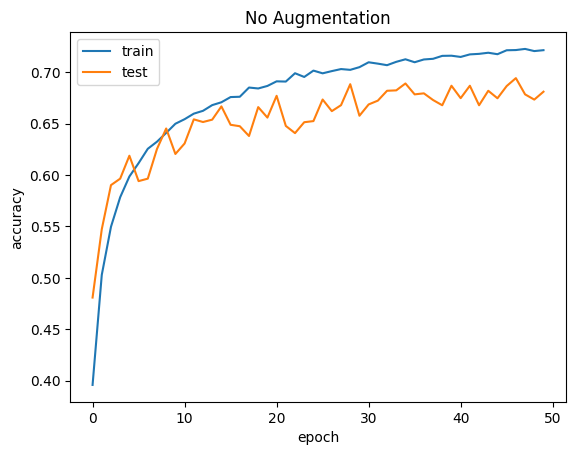

In [ ]:
model_train(model, title="No Augmentation")

It took around 7 min to train. at the end of training, the model had more than 70% accuracy on trainset and around 68% on test dataset

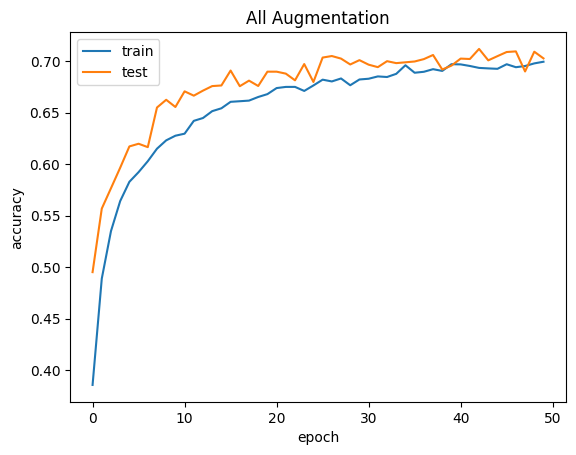

In [ ]:
model_train(aug_model, title='All Augmentation')

The model trained for 9 min. However, the performance on the train set is lower than the performance on the test set showing the better generalization and reduced overfitting.

Try it without dropout!

In [ ]:
# model_train(aug_fin_model, epochs=30, title="Not All Augmentations")

<h1>Conclusion</h1>

Data augmentation is a simple technique that reduces overfiting by diversifying the data. As the results show, the model using data augmentation generalized better and avoided overfiting. The model trained around 2 extra minutes (acceptable) compared to the model not using data augmentation. Yet, achieving a better performance on the test set (with aug around 70% vs no aug 68%).